# Income Outliers
 
The income data has several reports that appear three orders of magnitude lower than the bulk of the responses.  This notebook looks for any patterns.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from drs_sentani import get_survey, strip_chart
survey = get_survey()

In [2]:
survey['group_income_reg/electric_income'].describe()

count    1.109000e+03
mean     1.192605e+06
std      7.410150e+06
min      0.000000e+00
25%      1.000000e+05
50%      3.000000e+05
75%      1.000000e+06
max      2.400000e+08
Name: group_income_reg/electric_income, dtype: float64

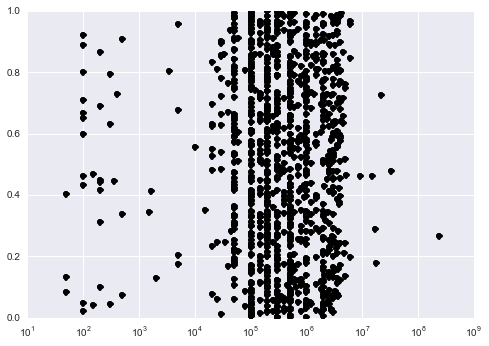

In [3]:
strip_chart(survey['group_income_reg/electric_income'])

## Enumerator differences

I plot these by enumerator and find that 028f and 977f have several that appear to miss three zeros.  It isn't visible in this logarithmic graph but enumerator 217f had several zero entries.

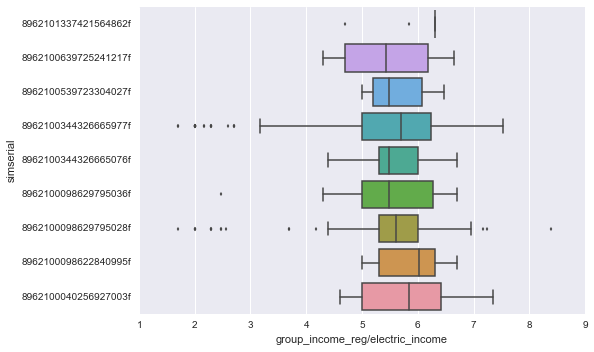

In [4]:
# there are some outliers by enumerator
sns.boxplot(np.log10(survey['group_income_reg/electric_income']), vert=False, groupby=survey['simserial'])

## Raw entries in table form

Here are all reported incomes below 10,000 rupiah.  Let me know if these would be better in an excel document or another format.

In [5]:
survey[(survey['group_income_reg/electric_income']<=1e4)][
    ['_uuid',
     'village_name',
     'group_income_reg/electric_income', 
     'group_income_reg/electric_income_freq',
     'simserial']]

,_uuid,village_name,group_income_reg/electric_income,group_income_reg/electric_income_freq,simserial
4,5f56ed91-ab52-435c-ba08-321ff3cf406c,Abar,300,NaN,8962100098629795028f
9,453fc633-5d0e-4f45-a03f-fb811df1fb06,Abar,200,NaN,8962100098629795028f
10,ab84bc11-33f5-4abf-947e-f61d63e5515b,Abar,200,NaN,8962100098629795028f
12,dc0890d7-7a9a-4d21-80dd-02dae713ae0d,Abar,300,NaN,8962100098629795036f
24,290c61fa-b2ab-4f92-b02c-51d674a77c11,Abar,200,NaN,8962100098629795028f
69,241161c1-b8ca-4772-a7b5-63f2cdf33bd6,Kensio,0,daily,8962100344326665076f
76,d1be4435-f360-4c15-8578-3e979d734fce,Ayapo,0,NaN,8962100344326665076f
83,6ebc3e85-f666-4d3f-a3dc-01fc1e14ba04,Yobeh,5000,NaN,8962100344326665977f
87,973dbb35-5114-46c2-aa92-b9d458ff42ad,Ayapo,0,NaN,8962100344326665076f
131,8e03ec0c-f8c7-4abd-a3e4-b35f2325252d,Yobeh,5000,NaN,8962100098629795028f
